### Import Libraries

In [1]:
import pandas as pd
import numpy as np 
import os 
import sys
import yaml
import tqdm 
import matplotlib.patches as mpatches
# import pandas_profiling as pp
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
from datetime import datetime, timedelta
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib.cbook import boxplot_stats
from IPython.display import display, HTML 

warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
# print(plt.style.available)

### Import Data

In [3]:
file_path = os.path.dirname(os.getcwd())+"\Data\Play_Tennis.csv"
print(f"file_path : {file_path}")

file_path : c:\Users\rakes\Local\Git_Repo\PythonCodeHub\EDA\Data\Play_Tennis.csv


In [4]:
dateParse = lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S") # %Y-%m-%d %H:%M:%S.%f
df = pd.read_csv(file_path,
                parse_dates=["DateTime","EndDateTime"],
                date_parser=dateParse,
                sep=",",
                header=0
                )

print("Data Imported !!!")

Data Imported !!!


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Day            14 non-null     object        
 1   Outlook        14 non-null     object        
 2   Temprature     14 non-null     object        
 3   Humidity       14 non-null     object        
 4   Wind           14 non-null     object        
 5   Play_Tennis    14 non-null     object        
 6   No_of_Players  14 non-null     int64         
 7   Ticket_Price   14 non-null     float64       
 8   DateTime       14 non-null     datetime64[ns]
 9   EndDateTime    14 non-null     datetime64[ns]
 10  IceCreamCost   14 non-null     float64       
dtypes: datetime64[ns](2), float64(2), int64(1), object(6)
memory usage: 1.3+ KB


In [6]:
display(HTML(df.head(2).to_html()))
print(df.head(2))

,Day,Outlook,Temprature,Humidity,Wind,Play_Tennis,No_of_Players,Ticket_Price,DateTime,EndDateTime,IceCreamCost
0,D1,Sunny,Hot,High,Weak,No,6,10.6,2023-01-01 01:10:10,2023-01-01 03:10:10,0.2
1,D2,Sunny,Hot,High,Strong,No,10,12.3,2023-01-02 02:30:10,2023-01-02 04:30:10,0.4


  Day Outlook Temprature Humidity    Wind Play_Tennis  No_of_Players  \
0  D1   Sunny        Hot     High    Weak          No              6   
1  D2   Sunny        Hot     High  Strong          No             10   

   Ticket_Price            DateTime         EndDateTime  IceCreamCost  
0          10.6 2023-01-01 01:10:10 2023-01-01 03:10:10           0.2  
1          12.3 2023-01-02 02:30:10 2023-01-02 04:30:10           0.4  


In [7]:
#def calc_avg(x):
#            rmse = round(np.sqrt(np.average(x['DurationSeconds'], x['{0}_{1}__Predictions'.format(package, model)])),2)
#            return pd.Series(dict(rmse = rmse))

#def calc_sum(x):
#    sum_ = 

### EDA

In [8]:
# df_aggr = df.groupby("Outlook").apply("Ticket_Price").reset_index()
df_aggr = df.groupby("Outlook")["Ticket_Price"].sum().reset_index()
df_aggr.columns = ["Outlook", "Ticket_Price"]
df_aggr

,Outlook,Ticket_Price
0,Overcast,179.61
1,Rain,170.45
2,Sunny,57.44


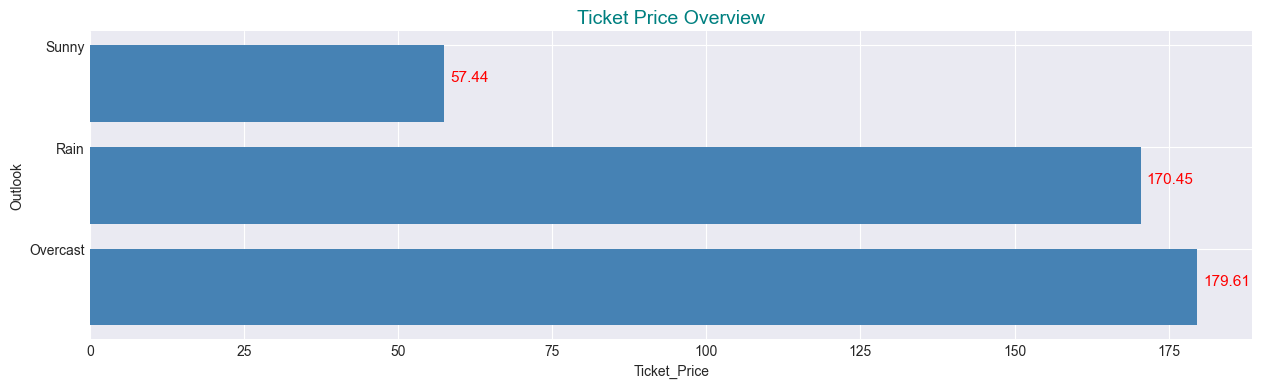

In [9]:
# Plotting
plt.style.use('seaborn-v0_8-darkgrid')

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15,4))

x = df_aggr["Outlook"].unique().tolist()
y = df_aggr["Ticket_Price"]
width = 0.75 # the width of the bars

ind = np.arange(len(y))  # the x locations for the groups
axes.barh(ind, y, width, color="steelblue")

for i, v in enumerate(y):
    axes.text(v + 1, i + .02, str(round(v,2)), color='red', fontsize=11)

axes.set_yticks(ind+width/2)
axes.set_yticklabels(x, minor=False)
axes.set_title("Ticket Price Overview{}".format(""), size=14, color="teal")
axes.set_xlabel("Ticket_Price")
axes.set_ylabel("{0}".format("Outlook"))

plt.show()

In [10]:
display(HTML(df.head(2).to_html()))
print(df.head(2))

,Day,Outlook,Temprature,Humidity,Wind,Play_Tennis,No_of_Players,Ticket_Price,DateTime,EndDateTime,IceCreamCost
0,D1,Sunny,Hot,High,Weak,No,6,10.6,2023-01-01 01:10:10,2023-01-01 03:10:10,0.2
1,D2,Sunny,Hot,High,Strong,No,10,12.3,2023-01-02 02:30:10,2023-01-02 04:30:10,0.4


  Day Outlook Temprature Humidity    Wind Play_Tennis  No_of_Players  \
0  D1   Sunny        Hot     High    Weak          No              6   
1  D2   Sunny        Hot     High  Strong          No             10   

   Ticket_Price            DateTime         EndDateTime  IceCreamCost  
0          10.6 2023-01-01 01:10:10 2023-01-01 03:10:10           0.2  
1          12.3 2023-01-02 02:30:10 2023-01-02 04:30:10           0.4  


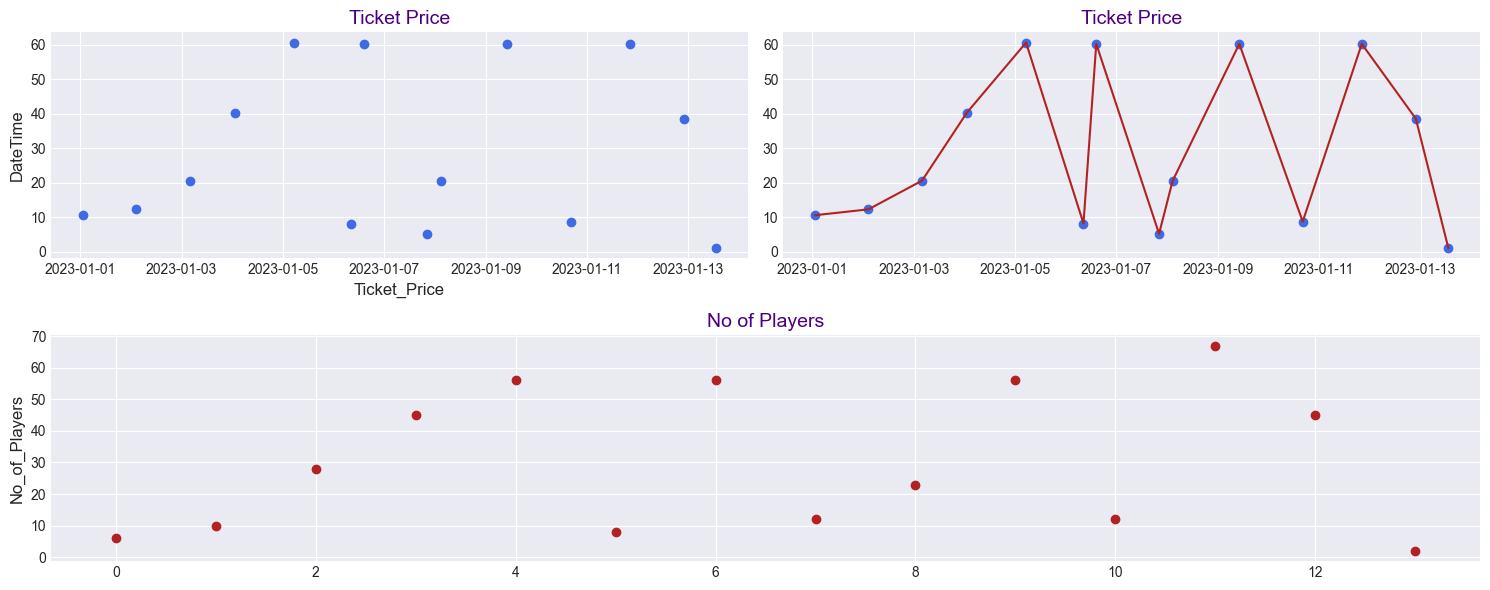

In [11]:
plt.style.use('seaborn-v0_8-darkgrid')

fig = plt.figure(figsize=(15,6))

gs = fig.add_gridspec(2,2)

ax1 = fig.add_subplot(gs[0, 0])
ax1.scatter(df.DateTime.tolist(), df["Ticket_Price"].tolist(), marker="o", color="royalblue")
ax1.set_ylabel("DateTime", size=12)
ax1.set_xlabel("Ticket_Price", size=12)
ax1.set_title("{0}".format("Ticket Price"), size=14, color="indigo")

ax2 = fig.add_subplot(gs[0, 1])
ax2.scatter(df.DateTime.tolist(), df["Ticket_Price"].tolist(), marker="o", color="royalblue")
ax2.plot(df.DateTime.tolist(), df["Ticket_Price"].tolist(), label="Ticket_Price", color="firebrick")
ax2.set_title("{0}".format("Ticket Price"), size=14, color="indigo")

ax3 = fig.add_subplot(gs[1, :])
ax3.plot(df.No_of_Players.tolist(),marker='o',linestyle='',color="firebrick")
ax3.set_ylabel("{0}".format("No_of_Players"), size=12)
#ax3.set_xlabel("{0}".format("No_of_Players"), size=12)
ax3.set_title("{0}".format("No of Players"), size=14, color="indigo")

plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

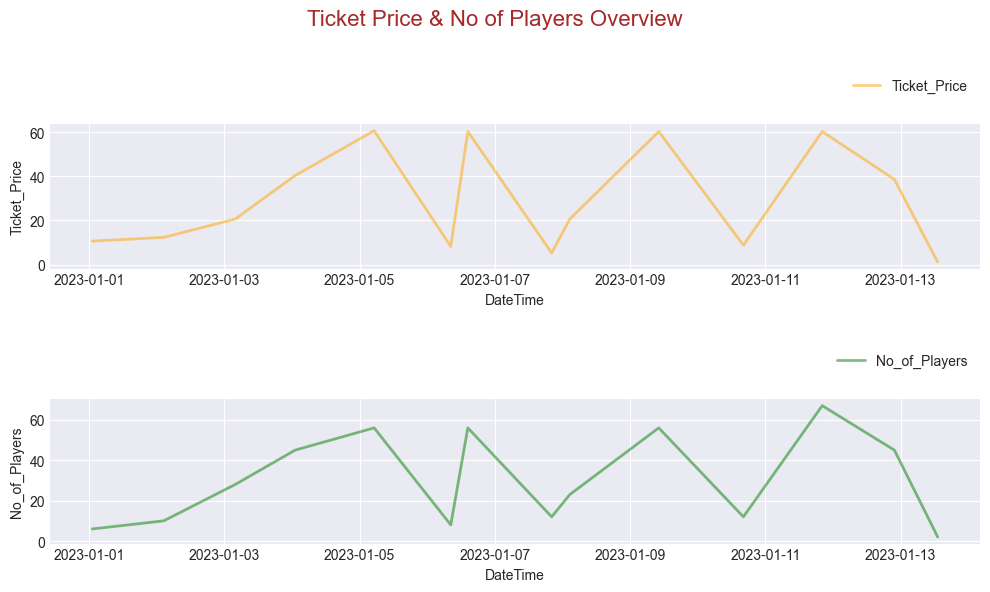

In [12]:
plt.clf()
# Set Plot Theme 

plt.style.use('seaborn-v0_8-darkgrid')    

fig, axes = plt.subplots(nrows=2, ncols=1, sharex=False, figsize=(10,6)) 
# sns.lineplot(x="DateTime", y="Ticket_Price", data=df, ax=axes[0][0], color='orange', linewidth=2, alpha=0.50, label="Ticket_Price") 
sns.lineplot(x="DateTime", y="Ticket_Price", data=df, ax=axes[0], color='orange', linewidth=2, alpha=0.50, label="Ticket_Price") 
# axes[0][0].legend(bbox_to_anchor=(1, 1.4),fancybox=True, shadow=True, ncol=5, loc='upper right')
axes[0].legend(bbox_to_anchor=(1, 1.4),fancybox=True, shadow=True, ncol=5, loc='upper right')

# sns.lineplot(x="DateTime", y="No_of_Players", data=df, ax=axes[1][0], color='Green', linewidth=2, alpha=0.50, label="No_of_Players") 
sns.lineplot(x="DateTime", y="No_of_Players", data=df, ax=axes[1], color='Green', linewidth=2, alpha=0.50, label="No_of_Players") 
# axes[1][0].legend(bbox_to_anchor=(1, 1.4),fancybox=True, shadow=True, ncol=5, loc='upper right')
axes[1].legend(bbox_to_anchor=(1, 1.4),fancybox=True, shadow=True, ncol=5, loc='upper right')

plt.suptitle(f"Ticket Price & No of Players Overview", size=16, color="#A52A2A")
plt.tight_layout()
plt.show()    

<Figure size 640x480 with 0 Axes>

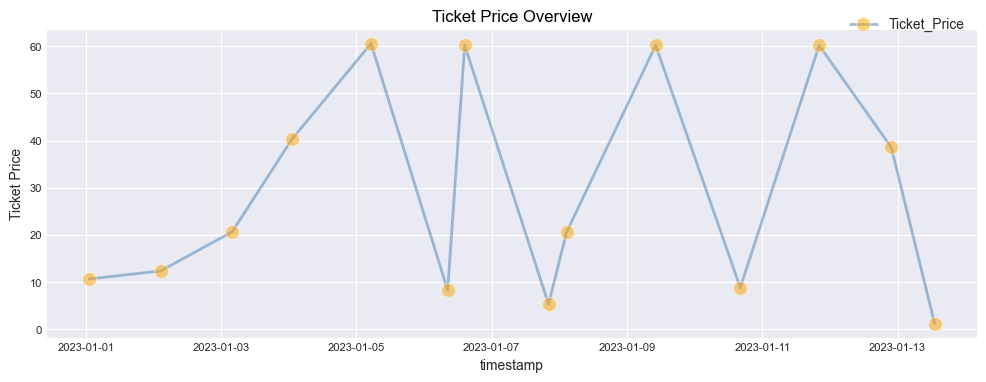

In [13]:
plt.clf()
plt.style.use("seaborn-v0_8-darkgrid")
fig, axes = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(12,4))
sns.lineplot(x="DateTime", y="Ticket_Price", 
                data=df, ax=axes, color='steelblue', 
                linewidth=2, alpha=0.50, 
                label="Ticket_Price", #markers="o",
                marker='o', markerfacecolor='orange', markersize=10
                )
axes.set_title("Ticket Price Overview", size=12, color="black")
# Preparing Legend Panel
axes.legend(bbox_to_anchor=(1, 1.08),fancybox=True, shadow=True, ncol=5, loc='upper right', prop={'size':10})
plt.xticks(fontsize=8)   # set sparse xtick values
plt.yticks(fontsize=8)   # set sparse ytick values
plt.xlabel('timestamp', fontsize=10)
plt.ylabel('Ticket Price', fontsize=10)
# plt.close() 
plt.show()